# Clustering

## Hierarchical Clustering

Think of geni within DNA trees - each node branches off into other nodes for clusters.

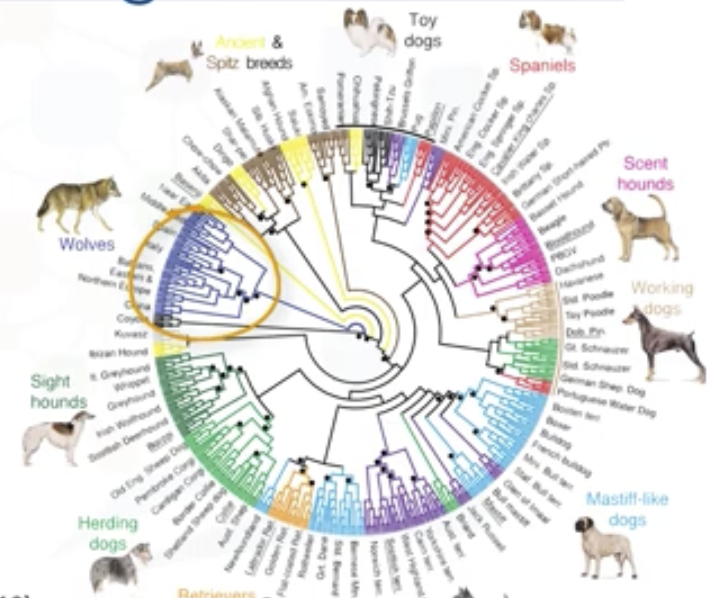

Hierarchical clustering can be either top-down (**divisive**) or bottom-up (**agglomerative**).
* Agglomerative Clustering tends to be most-popular among data scientists.

Maintain a distance matrix between two clusters, and choose the clusters with the minimum distance to group together into the next cluster.
* The distance bcan be Euclidean, Pearson, Average Distance, or others depending on data type and domain knowledge

Rows and columns are merged as the cluster is constructed.

Typically hierarchical clustering is visualized as a dendrogram, with the horizontal axis showing how far away two clusters are.

You don't need to specify how many clusters you want, but you can cut the hierarchy if desired.

### Agglomerative Algorithm

This is the **bottom-up** approach

So your dataset has $n$ datapoints:
1) Create $n$ clusters, one for each data point
2) Compute the Probability matrix, which is a table of size $n x n$
3) Repeat - merge the two closest clusters (distances are pre-computed in the probability matrix) then secondly update the probability matrix with the new values.
4) Stop when we've reach the specified number of clusters or there is only $1$ cluster remaining.

So the key operation is the computation of the proximity between the clusters with one point, and also the clusters with multiple points.

"*How do we measure the distance between these clusters and how do we define the nearest among clusters? Which points do we use?*"

### DBSCAN Clustering

Most data-clustering algorithms group data in an unsupervised way.
**Problem**: when these unsupervised clustering algorithms are applied to tasks with arbitrary shape clusters, or clusters within clusters, traditional techniques might not be able to achieve good results.

Also, algorithms like **K-Means** has no notion of outliers: every point belongs to a cluster (even when it maybe shouldn't), meaning there is no anomaly detection.

**Density-based clustering** locates regions of high density that are separated from one another by regions of low-density. Density, in this context, is defined as the number of points within a specified radius.

**DBSCAN** is a specific and very-popular form of this density-based clustering. It's particularly effective for tasks like class identification on a spatial context. It can find out any arbitrary-shape cluster without getting affected by noise.

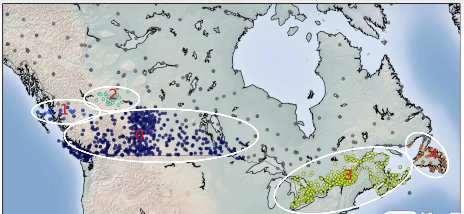

#### How it works

DBSCAN stands for "Density-Based Spatial Clustering of Applications with Noise"
* one of the most common clustering algorithms
* works based on the density of objects.

R **Radius** (Radius of neighborhood) - if it includes enough number of points within, we call it a *"dense area"*


M **Minimum number of Data Points** is simply the min number we want in a neighborhood to define a cluster.

Each observation in the dataset is either:
* Core
* Border
* Outlier

So first we pick a random point and check to see if it is a **core data point**. It's a core point if within $r$ neighborhood of the point, there are at-least $m$ points. 

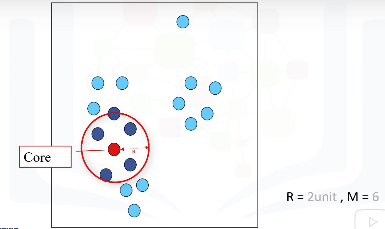

If a point is **not** a **core point** then it becomes a **border point**: it is reachable from some core point but doesn't have the neighborhood to be a core point.

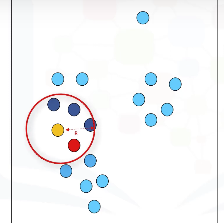

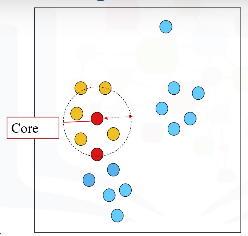

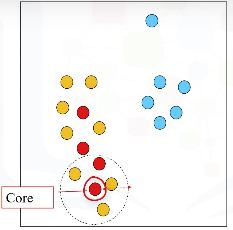

Points that are neither **core points** nor **border points** are called **outliers**.

Once all points have been labelled, core poitns that are neighbors are put into the same cluster.

## Hands-on DB Scan

In [2]:
# !pip install basemap

In [3]:
import numpy as np
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

# plt.scatter(X[:][0], X[:][1])
X.shape, y.shape

((1500, 2), (1500,))

In [5]:
epsilon = 0.3
min_samples = 7
db = DBSCAN(eps=epsilon, min_samples=min_samples)
db.fit(X)
labels = db.labels_
labels

array([0, 0, 1, ..., 0, 1, 0])

In [6]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [7]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

3

In [8]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

In [10]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99346405, 0.74771242, 0.43529412, 1.        ],
       [0.74771242, 0.89803922, 0.62745098, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

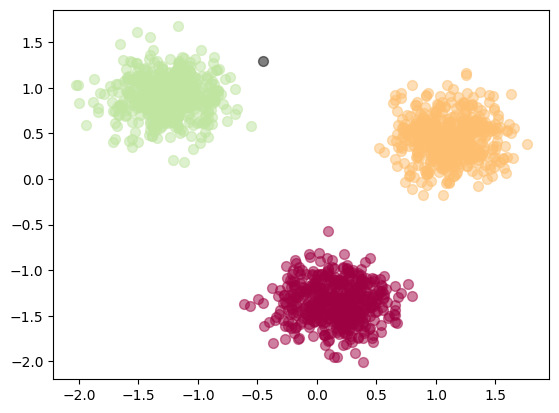

In [11]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)